#  Analyse et Conception des Algorithmes
Youssef Mourane <br>
OUSSAMA HILLAL

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
from matplotlib.patches import FancyArrowPatch 
from collections import deque 

Partie 1 :<br>
 la fonction " Affichage_Non_Orienté " prend les positions des nœuds et les arêtes comme arguments,
 puis affiche les nœuds en tant que points gris clair avec leur nom et trace des lignes entre les nœuds reliés.

In [2]:

def Affichage_Non_Orienté(positions, arêtes):
    """
    Fonction pour afficher un graphe non orienté.

    Args:
        positions (dict): Un dictionnaire contenant les noms des nœuds comme clés et les coordonnées (x, y) comme valeurs.
        arêtes (list): Une liste de tuples représentant les arêtes (connexions) entre les nœuds.

    Returns:
        None (Affiche le graphique)
    """
    fig, ax = plt.subplots() # Crée une figure et un axe pour le tracé
    
   # Affiche les nœuds avec leur étiquette

    for node, (x, y) in positions.items(): 
        ax.plot(x, y, 'o', markersize=30, color='lightgrey')  
        ax.text(x, y, node, ha='center', va='center', zorder=3, fontsize=12) 

    # Trace les arêtes   
    for i in arêtes: 
        x_coords = [positions[i[0]][0], positions[i[1]][0]] 
        y_coords = [positions[i[0]][1], positions[i[1]][1]] 
        ax.plot(x_coords, y_coords, 'k-', zorder=1) 

     # Définit les limites de l'axe   
    ax.set_xlim(-0.5, 5.5) 
    ax.set_ylim(-0.5, 3.5) 
    ax.axis('off') 
 
     # Ajoute un texte sous la figure
    plt.figtext(0.5, -0.05, "Affichage arbre non-orienté.", ha="center", fontsize=10) 
    
    plt.show() 

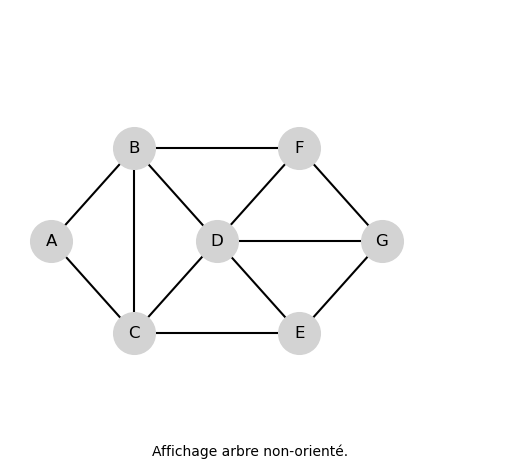

In [3]:
# exemple :

positions = { 
    'A': (0, 1),
    'B': (1, 2),
    'C': (1, 0),
    'D': (2, 1),
    'E': (3, 0),
    'F': (3, 2),
    'G': (4, 1),
}

arêtes = [('A', 'B'),('A', 'C'),('B', 'C'),('B', 'F'),('B', 'D'),('C', 'D'),('C', 'E'),('D', 'E'),('D', 'F'),('D', 'G'),('E', 'G'),('F', 'G'),]

Affichage_Non_Orienté(positions, arêtes)


Partie 2 :<br>
  Pour adapter la fonction "Affichage_Non_Orienté" afin qu'elle puisse afficher un graphe orienté, 
  nous devons modifier la façon   dont les arêtes sont tracées pour refléter la direction des arêtes.

In [4]:
def Affichage_Graphe_oriente(positions, arêtes, orienté=False):
    fig, ax = plt.subplots()

    # Affiche les nœuds avec leur étiquette
    for node, (x, y) in positions.items():
        ax.plot(x, y, 'o', markersize=30, color='lightgrey')
        ax.text(x, y, node, ha='center', va='center', zorder=3, fontsize=12)

    # Trace les arêtes
    for edge in arêtes:
        x_coords = [positions[edge[0]][0], positions[edge[1]][0]]
        y_coords = [positions[edge[0]][1], positions[edge[1]][1]]
        if orienté:
            # Si le graphe est orienté, utilise une flèche pour représenter l'arête
            ax.annotate("", xy=(x_coords[1], y_coords[1]), xytext=(x_coords[0], y_coords[0]),
                        arrowprops=dict(arrowstyle="->", color='black'))
        else:
            # Si le graphe est non orienté, utilise une ligne simple
            ax.plot(x_coords, y_coords, 'k-', zorder=1)

    # Définit les limites de l'axe
    ax.set_xlim(-0.5, 5.5)
    ax.set_ylim(-0.5, 3.5)
    ax.axis('off')

    # Ajoute un texte sous la figure
    graphe_type = "orienté" if orienté else "non orienté"
    plt.figtext(0.5, -0.05, f"Affichage graphe {graphe_type}.", ha="center", fontsize=10)

    # Affiche la figure
    plt.show()


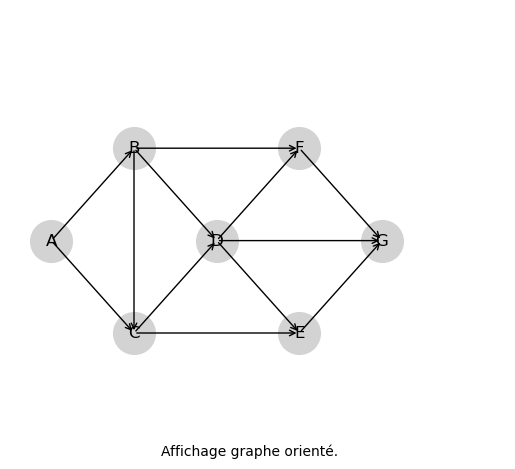

In [5]:
# exemple :
Affichage_Graphe_oriente(positions, arêtes, orienté=True)

parte 3 : dons cette parte il est :
- crée la classe " GraphAnimator " permet d'animer le parcours en largeur (BFS) d'un graphe non orienté.
- Le constructeur " __init__"  initialise le graphe, les positions des nœuds, les couleurs initiales, le nœud de départ
- La méthode " adjust_edge_position" ajuste les positions des arêtes pour éviter qu'elles ne pénètrent dans les nœuds.
- La méthode "draw_graph" dessine le graphe sur les axes matplotlib en utilisant les positions et les couleurs des nœuds.
- La méthode "bfs" exécute le parcours en largeur pour obtenir l'ordre de visite des nœuds.
- La méthode "create_frames" génère les différentes frames de l'animation en fonction de l'ordre de visite BFS.
- La méthode "show_animation" affiche l'animation du parcours en largeur du graphe.

In [6]:


class GraphAnimator:
    """
    Classe pour animer le parcours en largeur (BFS) d'un graphe non orienté.
    """

    def __init__(self, graph, positions, start_node):
       
        # Initialisation des attributs
        self.graph = graph  
        self.positions = positions  
        self.colors = {node: 'lightgrey' for node in graph}  
        self.colors[start_node] = 'red'  
        self.start_node = start_node  
        self.node_size = 0.15  
        self.frames = []  
        self.bfs_order = []  
    def adjust_edge_position(self, start, end):
        """
        Ajuster les positions des arêtes pour qu'elles ne pénètrent pas dans les nœuds.

        """
        direction = np.array(end) - np.array(start) 
        length = np.linalg.norm(direction)  
        direction = direction / length  
        start_adjusted = np.array(start) + direction * self.node_size  
        end_adjusted = np.array(end) - direction * self.node_size  
        return start_adjusted, end_adjusted  

    def draw_graph(self, ax, frame_colors):
        """
        Dessiner le graphe.
        """
        ax.clear()  
        ax.set_xlim(-1, 6) 
        ax.set_ylim(0, 4)  
        ax.set_aspect('equal')  
        ax.axis('off')  

        # Dessiner les arêtes
        for node, neighbors in self.graph.items():
            for neighbor in neighbors:
                start_pos = self.positions[node]  
                end_pos = self.positions[neighbor]  
                start_adjusted, end_adjusted = self.adjust_edge_position(start_pos, end_pos)  
                ax.plot([start_adjusted[0], end_adjusted[0]], [start_adjusted[1], end_adjusted[1]], 'black', linewidth=2)  

        # Dessiner les nœuds
        for node, pos in self.positions.items():
            ax.plot(pos[0], pos[1], 'o', markeredgecolor='black', markeredgewidth=2, color=frame_colors[node], markersize=30)  
            ax.text(pos[0], pos[1], node, color='black', ha='center', va='center', fontsize=12, fontweight='bold') 

    def bfs(self):
        """
        Exécuter le parcours en largeur (BFS) pour obtenir l'ordre de visite des nœuds.

        Retourne:
        order -- liste des tuples (nœud, profondeur) représentant l'ordre de visite
        """
        visited = {node: False for node in self.graph} 
        queue = deque([(self.start_node, 0)])  
        visited[self.start_node] = True  
        order = [] 

        while queue:
            node, depth = queue.popleft()  
            order.append((node, depth))  
            for neighbor in self.graph[node]:
                if not visited[neighbor]:  
                    queue.append((neighbor, depth + 1))  
                    visited[neighbor] = True  
        return order  

    def create_frames(self):
        """
        Créer les frames de l'animation en fonction de l'ordre de visite BFS.
        """
        self.bfs_order = self.bfs()  # Obtenir l'ordre de visite BFS
        all_nodes = set(self.graph.keys())  # Ensemble de tous les nœuds
        visited_nodes = set(node for node, _ in self.bfs_order)  # Ensemble des nœuds visités
        remaining_nodes = all_nodes - visited_nodes  # Nœuds non visités

        for node in remaining_nodes:
            self.bfs_order.append((node, max(depth for _, depth in self.bfs_order) + 1))  # Ajouter les nœuds non visités avec profondeur maximale

        frame_colors = self.colors.copy()  # Copier les couleurs initiales
        color_palette = ['red', 'green', 'blue', 'orange', 'yellow', 'purple', 'pink']  # Palette de couleurs pour l'animation
        for i, (node, depth) in enumerate(self.bfs_order):
            frame_colors[node] = color_palette[depth % len(color_palette)]  # Assigner une couleur en fonction de la profondeur
            self.frames.append(frame_colors.copy())  # Ajouter les couleurs de la frame à la liste des frames

    def show_animation(self):
        """
        Afficher l'animation du parcours en largeur du graphe.
        """
        for frame in self.frames:
            fig, ax = plt.subplots()  
            self.draw_graph(ax, frame) 
            plt.show()  



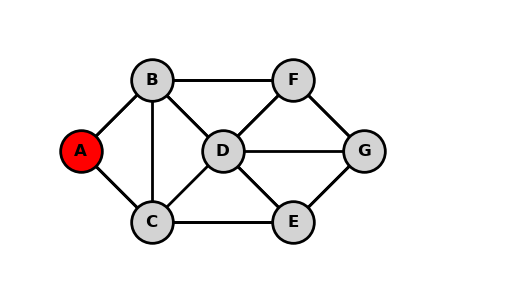

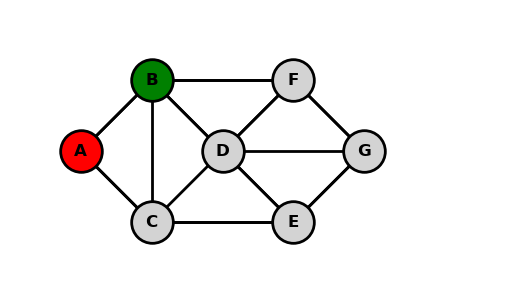

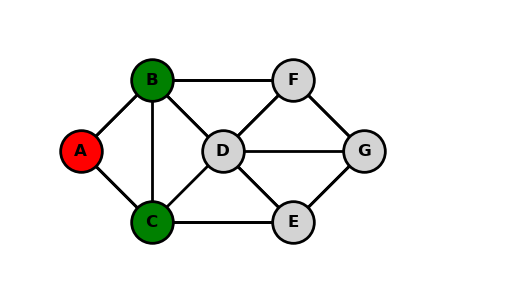

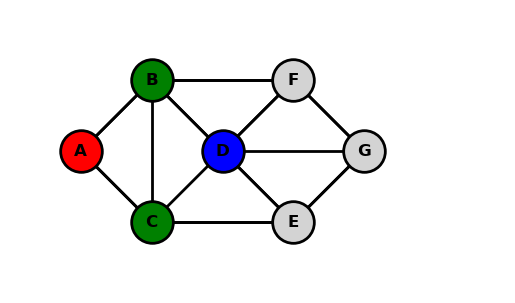

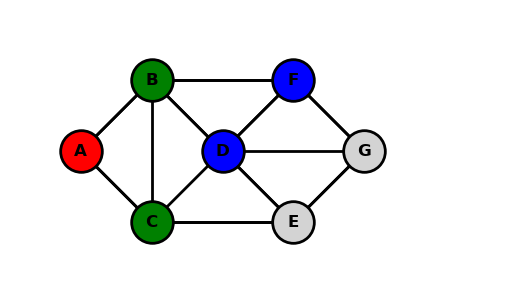

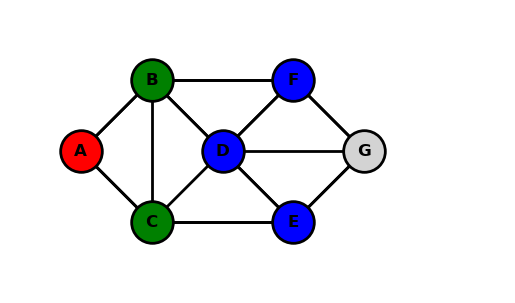

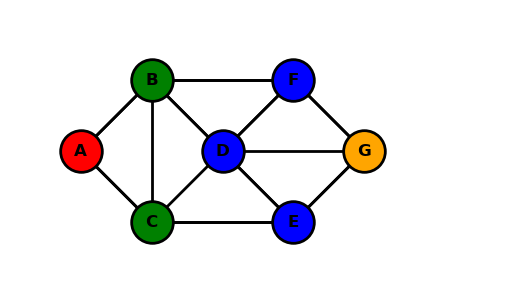

In [7]:
# Exemple :

graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'C', 'F'],
    'C': ['A', 'E', 'D'],
    'D': ['B', 'E', 'F', 'G'],
    'E': ['C', 'D', 'G'],
    'F': ['B', 'D', 'G'],
    'G': ['E', 'F'],
}

positions = {
    'A': (0, 2),
    'B': (1, 3),
    'C': (1, 1),
    'D': (2, 2),
    'E': (3, 1),
    'F': (3, 3),
    'G': (4, 2),
}

# Création d'un objet GraphAnimator
animator = GraphAnimator(graph, positions, 'A')

# Création des frames pour l'animation
animator.create_frames()

# Affichage de l'animation
animator.show_animation()
